In [8]:
## Classify images of clothing (neural network model)
## keras :  a high-level API to build and train models in TensorFlow.
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.2.0-dev20200501


In [9]:
## load to mnist dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [23]:
## Explore the data
train_images.shape

(60000, 28, 28)

In [24]:
len(train_images)

60000

In [25]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [27]:
test_images.shape

(10000, 28, 28)

In [28]:
len(test_images)

10000

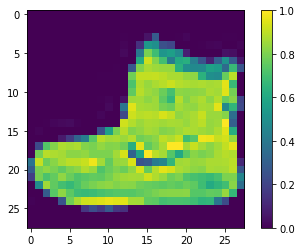

In [43]:
## Process the data 
## first images from train_images
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [44]:
## divede the values by 255, both them is preprocessed in the same way
train_images = train_images / 255.0
test_images = test_images / 255.0

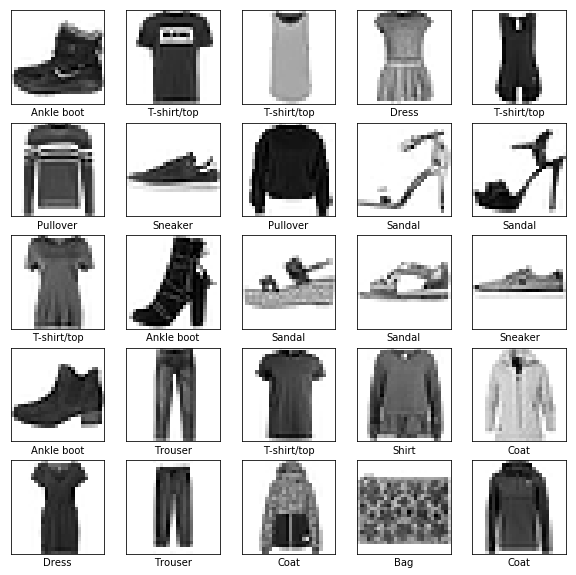

In [45]:
## display the first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [52]:
## Build the model
## setup the layes of neural network
## flatten : transform the format of the images from 2D array (28,28) to a 1D array (28*28=794 pixels)
## dense (first) : 128 is node or neuron, 
## dense(second) : returns a logits array with length of 10.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [53]:
## Compile the model
## before the model is reading for training, it needs a few more settings.
## loss function : measers how accurate the model is during training
## optimizer : how the model is updated based on the data
## metrics : monitor the training and testing steps (correctly classified)s

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
## Train The Model
## first : feed the data to model (with training data and labels array)
## second : model learns associate images and labels
## third : make predictions about a test set (with test_images)
## forth : verify predictions matchs labels (with test_labels)

## --- FEED The model (display loss and accuracy metrics)
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 984us/step - loss: 0.4265 - accuracy: 0.8491
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4200 - accuracy: 0.8531
Epoch 3/10
1875/1875 [==============================] - 2s 979us/step - loss: 0.4148 - accuracy: 0.8539
Epoch 4/10
1875/1875 [==============================] - 2s 992us/step - loss: 0.4092 - accuracy: 0.8564
Epoch 5/10
1875/1875 [==============================] - 2s 999us/step - loss: 0.4044 - accuracy: 0.8585
Epoch 6/10
1875/1875 [==============================] - 2s 986us/step - loss: 0.4000 - accuracy: 0.8600
Epoch 7/10
1875/1875 [==============================] - 2s 990us/step - loss: 0.3957 - accuracy: 0.8601
Epoch 8/10
1875/1875 [==============================] - 2s 991us/step - loss: 0.3921 - accuracy: 0.8619
Epoch 9/10
1875/1875 [==============================] - 2s 971us/step - loss: 0.3879 - accuracy: 0.8630
Epoch 10/10
1875/1875 [==============================] - 2s 996us/

In [56]:
## --- evaluate accracy (compare how the model performes on test dataset)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4257 - accuracy: 0.8477

Test accuracy: 0.8476999998092651


In [60]:
## make predictions (with some images)
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [61]:
predictions[0]

array([6.1629186e-07, 1.0656939e-08, 5.9371200e-06, 1.9946522e-06,
       4.1703238e-06, 1.5723769e-01, 2.0235677e-05, 1.2403660e-01,
       5.1724571e-03, 7.1352035e-01], dtype=float32)

In [62]:
np.argmax(predictions[0])

9

In [63]:
test_labels[0]

9

In [64]:
## graph : look at the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

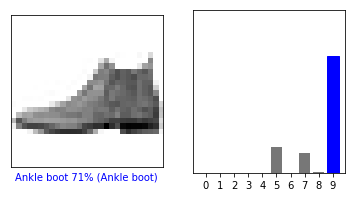

In [65]:
## Verify predictions :
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

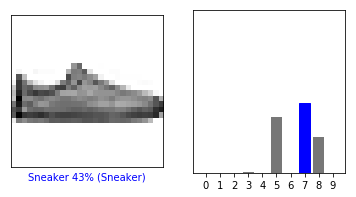

In [66]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

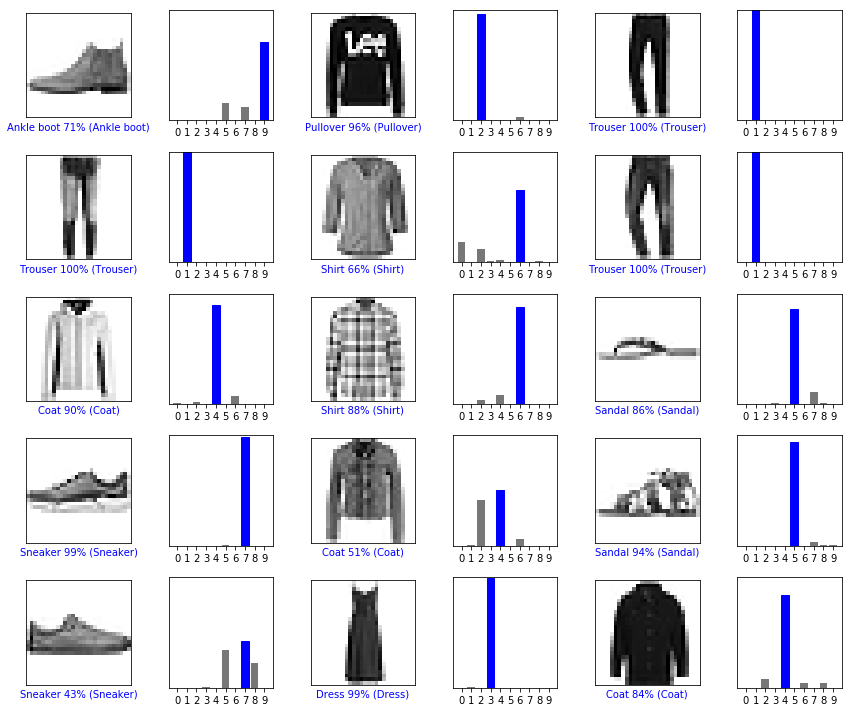

In [67]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [72]:
## use the train model : make a prediction about a single image
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


In [73]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [74]:
## predict the correct label for this image
predictions_single = probability_model.predict(img)
print(predictions_single)

[[2.3877238e-04 4.7995127e-07 9.5955080e-01 1.4895731e-05 7.6958411e-03
  2.1028220e-12 3.2407627e-02 2.4432351e-21 9.1537302e-05 1.3817162e-15]]


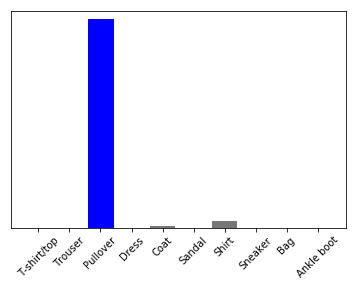

In [75]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [77]:
## returns a list of lists, grap the predictions for this image in the batch.
np.argmax(predictions_single[0])

2